In [48]:
import math
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import seaborn as sns


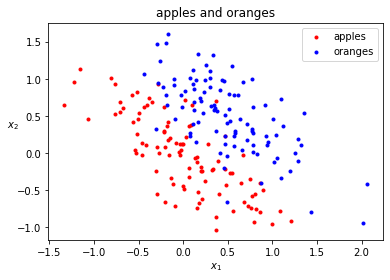

Datas shape:  (200, 2) Labels shape (200,)


In [49]:
expdat = np.genfromtxt(fname='resources/ex1/applesOranges.csv', delimiter=',',
                       dtype=np.float, skip_header=1)
x = expdat[:, :2]
y = expdat[:, -1]
plt.scatter(x[y == 0, 0], x[y == 0, 1], marker='.', c='r', label='apples')
plt.scatter(x[y == 1, 0], x[y == 1, 1], marker='.', c='b', label='oranges')
lgd = plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$', rotation='horizontal')
plt.title("apples and oranges")
plt.show()
print('Datas shape: ', x.shape, 'Labels shape', y.shape)

In [50]:
gammas = np.linspace(0, 180, 19)
weights = np.zeros((19, 2))
theta = 0.

for g in range(len(gammas)):
    weights[g, 0] = np.cos(gammas[g]*np.pi/180)
    weights[g, 1] = np.sin(gammas[g]*np.pi/180)

In [51]:
def transferFunction(data, weights, bias):
    h=np.matmul(weights, data.T) - bias
    y = np.where(h>0, 1, 0)
    return y.T

#Returns: matrix where (weights, points, thetas
def multidimTransferfunction(data, weights, biases):
    h=np.matmul(weights, data.T)
    #h = np.tile(h, (1, 1, biases.size))
    #bias_mat = np.zeros(h.shape)
    #bias_mat[:, :] = biases
    #y = np.where((h-bias_mat)>0, 1, 0)
    biased = h[:, :, np.newaxis] - biases
    y = np.where(biased > 0, 1, 0)
    
    return y

def calculatePerformance(result, labels):
    
    number = len(result)
    true = result == labels
    unique, counts = np.unique(true, return_counts=True)
    tv =  counts[unique==True]
    return tv/number

def multidimcalculatePerformance(results, labels):
    
    # true = np.zeros(results.shape)
    true =np.where(results == labels.reshape((1, labels.size, 1)), 1, 0)
    length = results.shape[1]
    heatmap = np.sum(true, axis=1, dtype=np.float32) / length
    return heatmap

In [52]:
predictions = transferFunction(x, weights, theta)
result = calculatePerformance(predictions[:, 0], y)
print('Result for first direction: ', result)

Result for first direction:  [0.675]


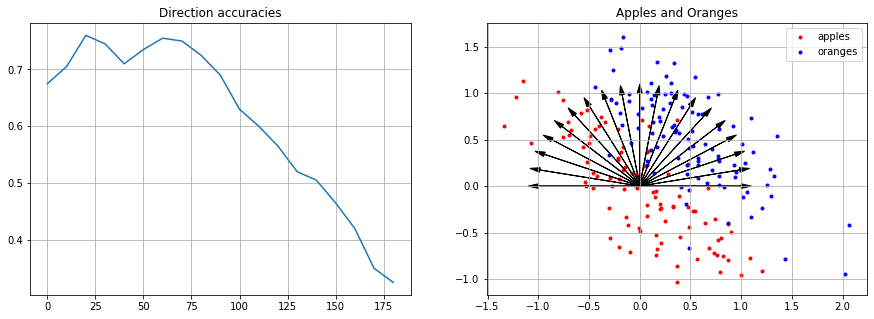

In [53]:
results = np.zeros(predictions.shape[1])
for i in range(predictions.shape[1]):
    results[i] = (calculatePerformance(predictions[:, i], y))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.plot(gammas, results)
ax1.set_title("Direction accuracies")
ax1.grid(True)
for i in range(weights.shape[0]):
    ax2.arrow(0, 0, weights[i, 0],weights[i, 1], head_width=0.05, head_length=0.1, fc='k', ec='k')
    
ax2.scatter(x[y == 0, 0], x[y == 0, 1], marker='.', c='r', label='apples')
ax2.scatter(x[y == 1, 0], x[y == 1, 1], marker='.', c='b', label='oranges')
ax2.grid(True)
lgd = plt.legend()
ax2.set_title("Apples and Oranges")
plt.show()

Max accuracy for theta:  0.1578947368421053


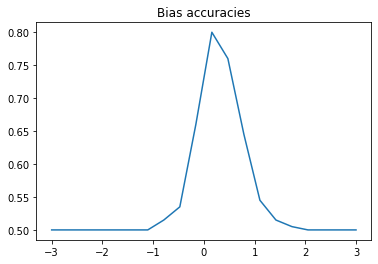

In [54]:
max_weight = weights[np.argmax(results), :]
thetas = np.linspace(-3, 3, 20)
res = np.zeros((thetas.size, y.size))
perf = np.zeros(thetas.size) 
for indx, t in enumerate(thetas):
    res[indx, :] = transferFunction(x, max_weight, t)
    perf[indx] = calculatePerformance(res[indx], y)

theta_max = thetas[np.argmax(perf)]    
print('Max accuracy for theta: ', theta_max)
plt.plot(thetas, perf)
plt.title("Bias accuracies")
plt.show()

No handles with labels found to put in legend.


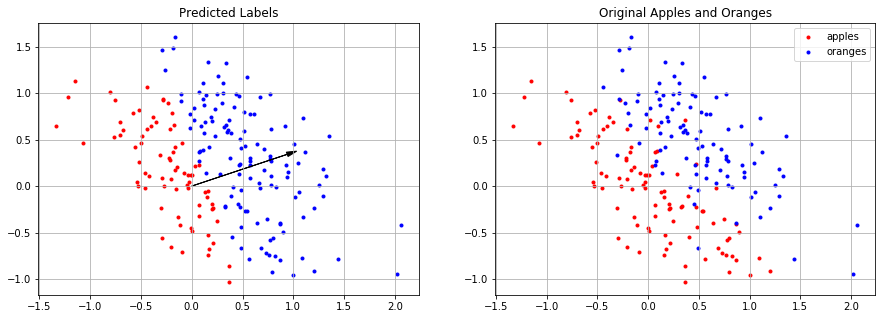

In [55]:

max_prediction = transferFunction(x, max_weight, theta_max)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.arrow(0, 0, max_weight[0],max_weight[1], head_width=0.05, head_length=0.1, fc='k', ec='k')
ax1.scatter(x[max_prediction == 0, 0], x[max_prediction == 0, 1], marker='.', c='r', label='Predicted Apples')
ax1.scatter(x[max_prediction == 1, 0], x[max_prediction == 1, 1], marker='.', c='b', label='Predicted Oranges')
ax1.grid(True)
lgd = plt.legend()
ax1.set_title("Predicted Labels")
ax1.grid(True)


ax2.scatter(x[y == 0, 0], x[y == 0, 1], marker='.', c='r', label='apples')
ax2.scatter(x[y == 1, 0], x[y == 1, 1], marker='.', c='b', label='oranges')
ax2.grid(True)
lgd = plt.legend()
ax2.set_title("Original Apples and Oranges")
plt.show()

(19, 200, 20)


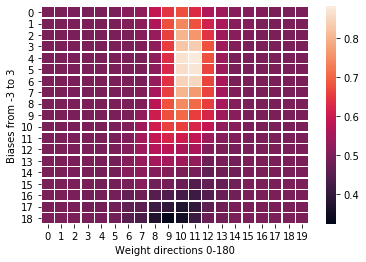

In [56]:
multi_results=multidimTransferfunction(x, weights, thetas)
print(multi_results.shape)
heatmap = multidimcalculatePerformance(multi_results, y)
ax = sns.heatmap(heatmap, linewidth=0.5)
plt.xlabel('Weight directions 0-180')
plt.ylabel('Biases from -3 to 3')
plt.show()